# Extract Mechanisms from Space

## Setup Environment

In [1]:
import os
import numpy as np
import pandas as pd

import scanpy as sc
import squidpy as sq
import liana as li
import matplotlib.pyplot as plt
from plots import *
from utils import load_prep_slide

In [2]:
import decoupler as dc

In [3]:
import plotnine as p9
from decoupler import p_adjust_fdr

In [4]:
import seaborn as sns

In [5]:
data_dir = os.path.join('..', '..', 'data', 'heart_visium')
dataset_names = [f for f in os.listdir(data_dir) if f.endswith('.h5ad')]

In [6]:
metadata = pd.read_csv(os.path.join("..", "spot_calling", "visium_meta.csv")).set_index('slide_name')
group_dict = {'group_1': 'Myogenic', 'group_2':'Ischemic', 'group_3': 'Fibrotic'}
rename_dict = {'Myogenic': 'Myogenic \n (n=14)', 'Ischemic':'Ischemic \n (n=9)', 'Fibrotic': 'Fibrotic \n (n=5)'}
condition_key = 'patient_group'

In [7]:
metadata['patient_group'] = metadata['patient_group'].map(group_dict)

## Process Datasets

In [8]:
lrdatas = {}

for dataset_name in dataset_names:
   sample_id = metadata.loc[dataset_name.replace('.h5ad', ''), 'hca_sample_id']
   
   print(f"dataset_name: {dataset_name}; {sample_id}")
   adata = load_prep_slide(data_dir, dataset_name, add_sample_name=True)

   li.ut.spatial_neighbors(adata, bandwidth=150, set_diag=True, cutoff=0.1)

   adata.write_h5ad(os.path.join('results', 'processed', sample_id + '.h5ad'))

   li.mt.lr_bivar(adata,
                  function_name='cosine',
                  expr_prop=0.1,
                  n_perms=None,
                  use_raw=False,
                  add_categories=False,
                  # mask_negatives=True,
                  )
   lrdata = adata.obsm['local_scores']
   
   # save to folder
   lrdata.write_h5ad(os.path.join('results', 'lr', sample_id + '.h5ad'))

   lrdatas[sample_id] = lrdata

dataset_name: Visium_4_CK282.h5ad; ACH004


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
... storing 'ligand' as categorical
... storing 'receptor' as categorical


dataset_name: Visium_7_CK285.h5ad; ACH0014


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
... storing 'ligand' as categorical
... storing 'receptor' as categorical


dataset_name: Visium_9_CK287.h5ad; ACH0012


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
... storing 'ligand' as categorical
... storing 'receptor' as categorical


dataset_name: Visium_15_CK293.h5ad; ACH0016


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
... storing 'ligand' as categorical
... storing 'receptor' as categorical


dataset_name: AKK003_157775.h5ad; 10X0018


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
... storing 'ligand' as categorical
... storing 'receptor' as categorical


dataset_name: Visium_1_CK279.h5ad; ACH002


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
... storing 'ligand' as categorical
... storing 'receptor' as categorical


dataset_name: AKK003_157777.h5ad; 10X0025


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
... storing 'ligand' as categorical
... storing 'receptor' as categorical


dataset_name: Visium_18_CK296.h5ad; ACH0011


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
... storing 'ligand' as categorical
... storing 'receptor' as categorical


dataset_name: Visium_13_CK291.h5ad; ACH006


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
... storing 'ligand' as categorical
... storing 'receptor' as categorical


dataset_name: AKK004_157772.h5ad; 10X009


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
... storing 'ligand' as categorical
... storing 'receptor' as categorical


dataset_name: AKK001_157785.h5ad; 10X0027


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
... storing 'ligand' as categorical
... storing 'receptor' as categorical


dataset_name: Visium_6_CK284.h5ad; ACH0023


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
... storing 'ligand' as categorical
... storing 'receptor' as categorical


dataset_name: Visium_12_CK290.h5ad; ACH005


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
... storing 'ligand' as categorical
... storing 'receptor' as categorical


dataset_name: Visium_20_CK298.h5ad; ACH0015


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
... storing 'ligand' as categorical
... storing 'receptor' as categorical


dataset_name: AKK002_157781.h5ad; 10X0026


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
... storing 'ligand' as categorical
... storing 'receptor' as categorical


dataset_name: Visium_19_CK297.h5ad; ACH0013


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
... storing 'ligand' as categorical
... storing 'receptor' as categorical


dataset_name: Visium_5_CK283.h5ad; ACH0028


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
... storing 'ligand' as categorical
... storing 'receptor' as categorical


dataset_name: AKK006_157771.h5ad; 10X001


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
... storing 'ligand' as categorical
... storing 'receptor' as categorical


dataset_name: AKK002_157782.h5ad; 10X0020


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
... storing 'ligand' as categorical
... storing 'receptor' as categorical


dataset_name: Visium_16_CK294.h5ad; ACH007


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
... storing 'ligand' as categorical
... storing 'receptor' as categorical


dataset_name: Visium_10_CK288.h5ad; ACH0024


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
... storing 'ligand' as categorical
... storing 'receptor' as categorical


dataset_name: Visium_3_CK281.h5ad; ACH003


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
... storing 'ligand' as categorical
... storing 'receptor' as categorical


dataset_name: Visium_14_CK292.h5ad; ACH008


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
... storing 'ligand' as categorical
... storing 'receptor' as categorical


dataset_name: Visium_8_CK286.h5ad; ACH0019


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
... storing 'ligand' as categorical
... storing 'receptor' as categorical


dataset_name: Visium_17_CK295.h5ad; ACH0022


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
... storing 'ligand' as categorical
... storing 'receptor' as categorical


dataset_name: AKK002_157779.h5ad; 10X0017


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
... storing 'ligand' as categorical
... storing 'receptor' as categorical


dataset_name: Visium_2_CK280.h5ad; ACH0021


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
... storing 'ligand' as categorical
... storing 'receptor' as categorical


dataset_name: Visium_11_CK289.h5ad; ACH0010


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
... storing 'ligand' as categorical
... storing 'receptor' as categorical


## Run NMF on the whole Dataset

In [9]:
features = pd.concat([lrdatas[dataset_name].var for dataset_name in lrdatas])
features['count'] = 1
features = features.reset_index().groupby('interaction').sum().sort_values('count')

<Axes: >

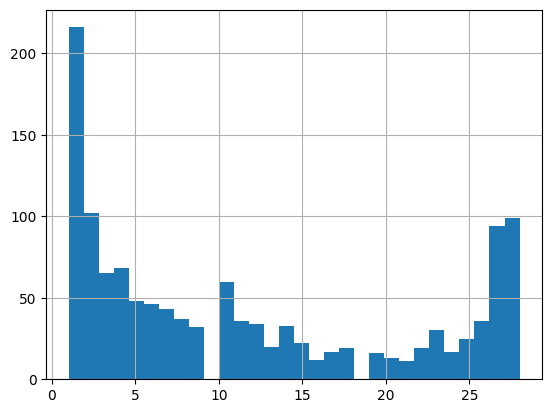

In [10]:
features['count'].hist(bins=30)

Keep features in at least X samples

In [11]:
features = features[features['count'] >= 5]

In [12]:
lrdata_all = sc.concat(lrdatas, join='outer', fill_value=0)
lrdata_all

AnnData object with n_obs × n_vars = 91205 × 1270
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mt_frac', 'celltype_niche', 'molecular_niche', 'n_genes'
    obsm: 'compositions', 'mt', 'spatial'

In [13]:
# subset to de features
lrdata_all = lrdata_all[:, features.index]
lrdata_all

View of AnnData object with n_obs × n_vars = 91205 × 819
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mt_frac', 'celltype_niche', 'molecular_niche', 'n_genes'
    obsm: 'compositions', 'mt', 'spatial'

## Run NMF

In [14]:
li.multi.nmf(lrdata_all, n_components=None, inplace=True, random_state=1337, max_iter=400, verbose=True, k_range=range(1, 21))

  0%|          | 0/20 [00:00<?, ?it/s]

/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 400 reached. Increase it to improve convergence.
100%|██████████| 20/20 [25:30<00:00, 76.52s/it] 
Estimated rank: 5
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/multi/_nmf.py:73: ImplicitModificationWarning: Setting element `.obsm['NMF_W']` of view, initializing view as actual.


In [15]:
lrdata_all.write_h5ad(os.path.join('results', 'lr', 'lrdata_all.h5ad'))

In [16]:
lr_loadings = li.ut.get_variable_loadings(lrdata_all, varm_key='NMF_H').set_index('index')

In [17]:
metadata = metadata.reset_index().set_index('hca_sample_id')

In [18]:
# save the NMF factors to the individual samples
for sample in lrdatas:
    labl = metadata.loc[sample, 'major_labl']
    lrdata = lrdatas[sample]
    # Get the NMF factors for the current sample from the full dataset
    temp = lrdata_all[lrdata_all.obs.index.isin(lrdata.obs.index), :]
    temp = temp[:, temp.var.index.isin(lrdata.var.index)]
    
    # extract NMF from obsm
    ad_nmf = sc.AnnData(X=temp.obsm['NMF_W'],
                        obs=temp.obs,
                        var=pd.DataFrame(index=lr_loadings.columns),
                        uns=lrdata.uns,
                        obsm={'spatial':temp.obsm['spatial']}
                        )
    ad_nmf.write_h5ad(os.path.join('results', 'nmf', sample + '.h5ad'))
    
    # plot
    # sq.pl.spatial_scatter(ad_nmf, color=[None, *lr_loadings.columns], cmap='viridis', title=f"{sample}:{labl}", vmin=0, size=1.4, img=True) #
    # plt.show() 

Check loadings

In [19]:
lrdata_all = sc.read_h5ad(os.path.join('results', 'lr', 'lrdata_all.h5ad'))

In [20]:
lr_loadings = li.ut.get_variable_loadings(lrdata_all, varm_key='NMF_H').set_index('index')

In [21]:
metadata = metadata.reset_index().set_index('hca_sample_id')

### Analyse Loadings

In [22]:
nmfdata = sc.AnnData(X=lrdata_all.obsm['NMF_W'].copy(),
                     obs=lrdata_all.obs,
                     var=pd.DataFrame(index=lr_loadings.columns),
                     uns=lrdata_all.uns,
                     obsm={'spatial':lrdata_all.obsm['spatial']}
                     )

In [23]:
indices = lrdata_all.obs.index
nmfdata.obs = nmfdata.obs.merge(metadata.reset_index(), left_on='sample', right_on='slide_name')
nmfdata.obs.index = indices

In [24]:
errors = lrdata_all.uns['nmf_errors']
rank = lrdata_all.uns['nmf_rank']

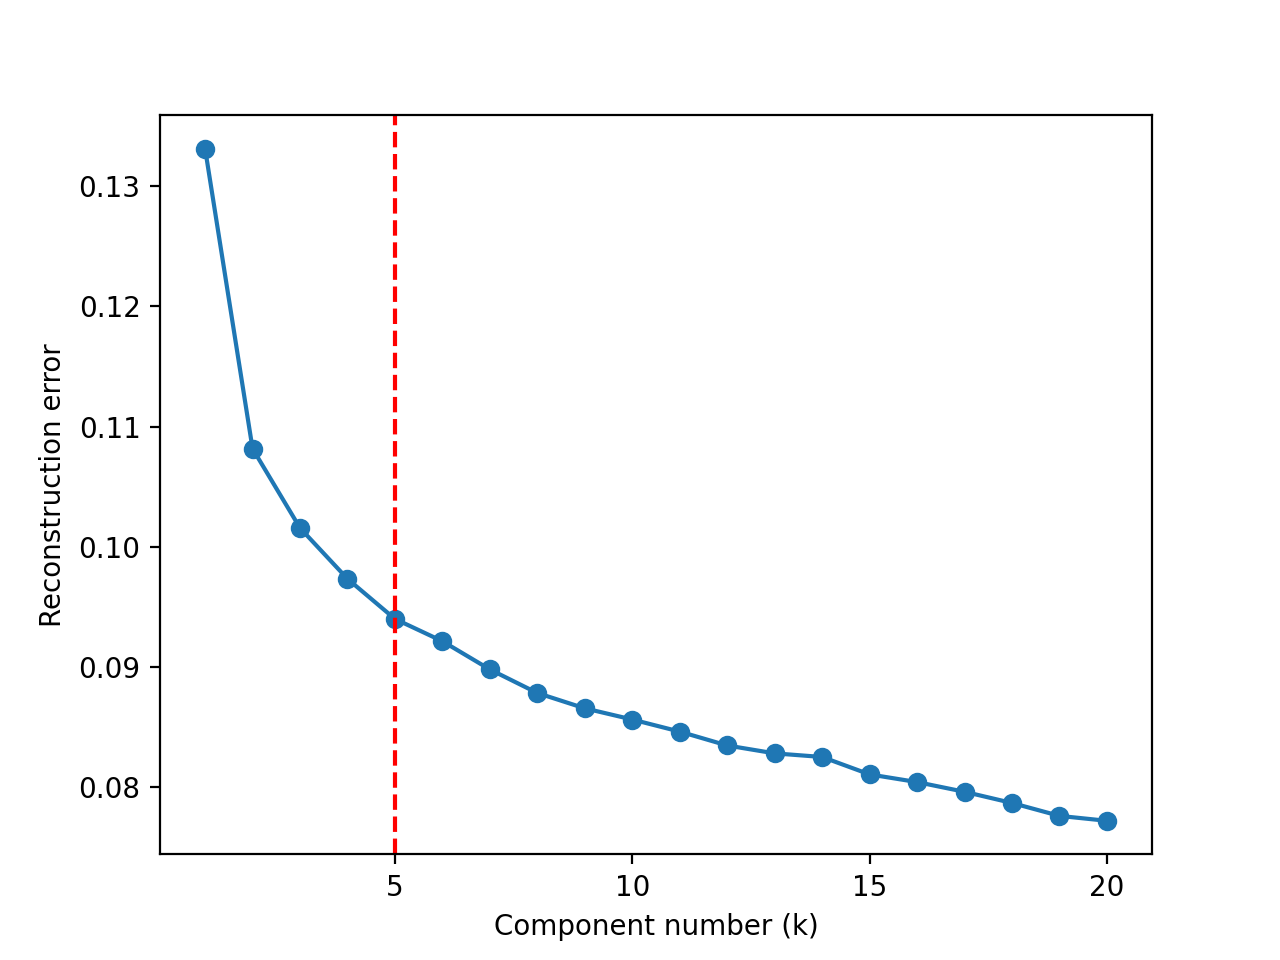

In [25]:
import matplotlib.pyplot as plt

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot the line and points
ax.plot(errors['k'], errors['error'], marker='o')

# Add the vertical line
ax.axvline(x=rank, linestyle='--', color='red')

# Set the x-ticks only if they are divisible by 5
ax.set_xticks([x for x in errors['k'].values if x % 5 == 0])

# Set the labels
ax.set_xlabel('Component number (k)')
ax.set_ylabel('Reconstruction error')

# Show the plot
plt.show()

Averages per slide

In [26]:
nmfdata.write_h5ad(os.path.join('results', 'nmf', 'nmfdata.h5ad'))

... storing 'sample' as categorical
... storing 'hca_sample_id' as categorical
... storing 'slide_name' as categorical
... storing 'patient' as categorical
... storing 'patient_region_id' as categorical
... storing 'patient_group' as categorical
... storing 'major_labl' as categorical
... storing 'batch' as categorical


In [27]:
nmfbulk = dc.get_pseudobulk(nmfdata,
                            sample_col='hca_sample_id',
                            groups_col=None,
                            mode='mean',
                            skip_checks=True,
                            min_cells=0,
                            min_counts=0,
                            min_prop=None,
                            min_smpls=None
                            )

In [28]:
nmfbulk.obs['patient_group'] = nmfbulk.obs['patient_group'].map(rename_dict)

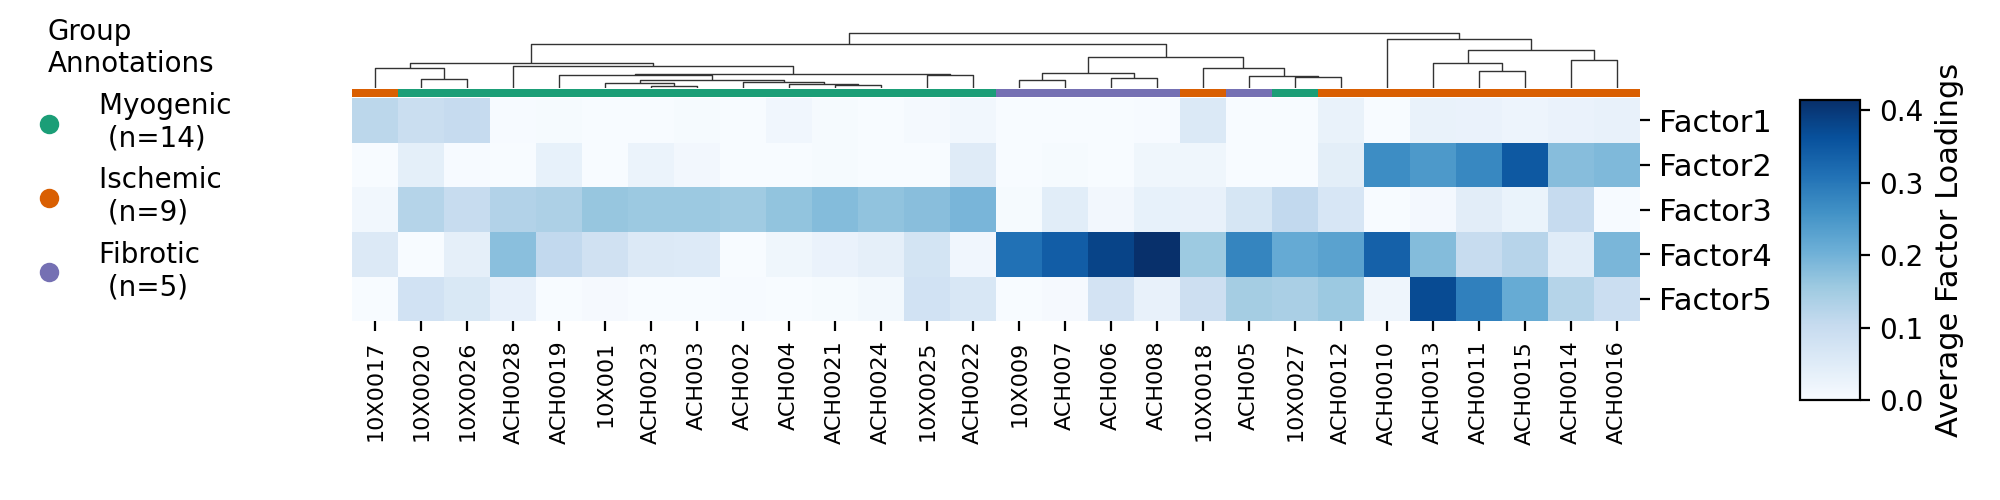

In [29]:

group_annotations = nmfbulk.obs['patient_group'].values
group_labels = set(group_annotations)
# import colour map Dark2 from seaborn
cmap = sns.color_palette('Dark2', n_colors=len(group_labels))
# get cmap values for each group annotation as hex
group_cmap = dict(zip(group_labels, cmap))
group_cols = [group_cmap[key] for key in group_labels]

chart = sns.clustermap(nmfbulk.X.T,
                       cmap='Blues',
                       cbar_kws={'orientation':'vertical'},
                       row_cluster=False,
                       col_cluster=True,
                       col_colors=[group_cmap[x] for x in group_annotations],
                       figsize=(10, 2.5),
                       xticklabels=nmfbulk.obs.index,
                       yticklabels=nmfbulk.var.index,
                       cbar_pos=None
                       )
# # rotate labels
chart.ax_heatmap.set_yticklabels(chart.ax_heatmap.get_ymajorticklabels(), rotation=0, fontdict={'fontsize':11})
chart.ax_heatmap.set_xticklabels(chart.ax_heatmap.get_xmajorticklabels(), fontsize=8)

# create separate axes for colorbar
cbar_ax = chart.fig.add_axes([.9, .2, .03, .6])  # x, y, width, height
cbar = plt.colorbar(chart.ax_heatmap.get_children()[0], cax=cbar_ax)
cbar.set_label('Average Factor Loadings', size=11, loc='center')  # Add title to the colorbar

# Create custom legend
legend_handles = []
for label, color in zip(group_labels, group_cols):
    legend_handles.append(plt.Line2D([0], [0], color=color, marker='o', linestyle='', label=label))

# Add legend
legend = plt.legend(handles=legend_handles, title='Group\nAnnotations', loc='upper right', frameon=False)

# Move the legend
chart_size = chart.ax_heatmap.get_position()
plt.setp(legend.get_title(), fontsize='medium')
legend.set_bbox_to_anchor((chart_size.x1-26.5, chart_size.y0+1))
plt.subplots_adjust(right=.82)
plt.show()

### Pathway Enrichment

In [30]:
lr_nmf = pd.DataFrame(lrdata_all.varm['NMF_H'], index=lrdata_all.var.index, columns=lr_loadings.columns)

In [31]:
lr_nmf.to_csv(os.path.join('results', 'lr_loadings.csv'))

In [32]:
lr_nmf.sort_values("Factor3", ascending=False).head(10)

,Factor1,Factor2,Factor3,Factor4,Factor5
S100A1^RYR2,2.948624,0.000000,4.654895,0.470143,0.843711
CALM1^RYR2,3.278412,0.000000,4.542714,0.590024,0.863716
COL1A2^CD36,3.181967,1.355119,4.042623,1.452429,0.481686
LGALS1^ITGB1,5.132720,1.378394,4.006946,1.483343,0.297797
VWF^ITGB1,4.028054,1.187038,3.989029,1.213391,0.574225
CALM1^AQP1,3.219466,0.705283,3.909772,0.913423,0.782359
CD99^CD81,4.231565,1.285962,3.907125,1.412619,0.501530
C3^CD81,2.656247,1.434664,3.848673,1.069066,0.000000
TIMP1^CD63,5.717094,1.515436,3.750679,1.759758,0.070031
HLA-A^APLP2,4.378452,1.461341,3.736025,1.287447,0.295848


Read NMF results

In [33]:
lr_nmf = pd.read_csv(os.path.join('results', 'lr_loadings.csv'), index_col=0)

In [34]:
# load PROGENy pathways
net = dc.get_progeny(organism='human', top=5000)
# load full list of ligand-receptor pairs
lr_pairs = li.resource.select_resource('consensus')

/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


ImportError: omnipath is not installed. Please install it by: `pip install omnipath`.

In [ ]:
# generate ligand-receptor geneset
lr_progeny = li.rs.generate_lr_geneset(lr_pairs, net, lr_sep="^")
lr_progeny.head()

/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/resource/_resource_utils.py:109: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/resource/_resource_utils.py:113: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/resource/_resource_utils.py:120: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future de

,source,interaction,weight
60,JAK-STAT,LGALS9^PTPRC,1.307807
844,JAK-STAT,LGALS9^CD47,2.054778
1130,Trail,LGALS9^PTPRK,0.937003
1432,JAK-STAT,LGALS9^HAVCR2,1.487678
1779,EGFR,DLL1^NOTCH1,-1.000584


In [ ]:
# run pathway enrichment analysis
estimate, pvals =  dc.run_ulm(lr_nmf.transpose(),
                              lr_progeny,
                              source="source",
                              target="interaction",
                              use_raw=False,
                              min_n=5)

In [ ]:

# Pivot and merge data
estimate_long = estimate.melt(ignore_index=False, value_name='estimate', var_name='pathway').reset_index().rename(columns={'index':'factor'})
pvals_long = pvals.melt(ignore_index=False, value_name='pval', var_name='pathway').reset_index().rename(columns={'index':'factor'})
dc_res = estimate_long.merge(pvals_long, on=['factor', 'pathway'])

In [ ]:
dc_res['adj_pval'] = p_adjust_fdr(dc_res['pval'])

Odds Ratios on the Average Sample Loadings

In [ ]:
df = pd.DataFrame(nmfbulk.X, columns=lr_loadings.columns, index=nmfbulk.obs.index)
df['sample'] = nmfbulk.obs['sample']
df = df.merge(metadata.reset_index(), left_on='sample', right_on='slide_name')

In [ ]:
import pandas as pd
from scipy.stats import fisher_exact

# Assuming df is your pandas DataFrame
factors = lr_loadings.columns
labels = df['patient_group'].unique()

# Initialize a DataFrame to store the results
odds = pd.DataFrame(columns=['factor', 'patient_group', 'odds_ratio', 'p_value'])

# Iterate over each factor and each label
for factor in factors:
    # Determine the top threshold
    threshold = df[factor].quantile(0.75)
    
    for label in labels:
        # Create a 2x2 contingency table
        top_and_label = sum((df[factor] >= threshold) & (df['patient_group'] == label))
        top_and_not_label = sum((df[factor] >= threshold) & (df['patient_group'] != label))
        not_top_and_label = sum((df[factor] < threshold) & (df['patient_group'] == label))
        not_top_not_label = sum((df[factor] < threshold) & (df['patient_group'] != label))
        
        contingency_table = [[top_and_label, top_and_not_label],
                             [not_top_and_label, not_top_not_label]]
        
        # Perform Fisher's exact test
        odds_ratio, p_value = fisher_exact(contingency_table)
        
        # Store results
        odds.loc[len(odds)] = [factor, label, odds_ratio, p_value]


In [ ]:
odds['log2_odds'] = np.log2(odds['odds_ratio'])

# if -inf, set to min (except -inf)
odds['log2_odds'] = odds.apply(lambda x: np.log2(1/1000) if x['log2_odds'] == -np.inf else x['log2_odds'], axis=1)
# if inf, set to max
odds['log2_odds'] = odds.apply(lambda x: np.log2(1000) if x['log2_odds'] == np.inf else x['log2_odds'], axis=1)

/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2


In [ ]:
odds['adj_pval'] = p_adjust_fdr(odds['p_value'])

In [ ]:
# as category and alphabetical
odds['patient_group'] = odds['patient_group'].astype('category')
odds['patient_group'] = odds['patient_group'].cat.reorder_categories(sorted(odds['patient_group'].unique()))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_heatmap(res, 
                      fill='estimate', 
                      index_key="factor",
                      column_key='pathway',
                      label='pval',
                      cbar_label=None,
                      max_value=None, 
                      significance_level=0.05,
                      filter_significant=True,
                      figsize=(4, 4),  # Adjusted for better visibility
                      cmap='RdBu_r',
                      move_labels=False,
                      group_annotations=None  # Dictionary for column colors
                     ):
    res = res.copy()
    if max_value is not None:
        res.loc[res[fill] > max_value, fill] = max_value
        res.loc[res[fill] < -max_value, fill] = -max_value
    
    res['significant'] = res[label].apply(lambda x: '*' if x < significance_level else '')
    
    if filter_significant:
        sig_paths = res[res[label] <= significance_level][column_key].unique()
    else:
        sig_paths = res[column_key].unique()

    # Filter for significant pathways
    filtered_data = res[res[column_key].isin(sig_paths)]
    
    # Create pivot table for heatmap
    heatmap_data = filtered_data.pivot(index=index_key, columns=column_key, values=fill)
    heatmap_data.sort_index(inplace=True, ascending=False)
    
    # Prepare row colors
    if group_annotations:
        # Get unique labels from the index
        unique_labels = heatmap_data.columns.unique()
        # Map each label to a color
        col_colors = list(pd.Series(unique_labels, index=unique_labels).map(group_annotations).reindex(heatmap_data.columns))
    else:
        col_colors = None

    # Create clustermap
    g = sns.clustermap(heatmap_data,
                       figsize=figsize,
                       cmap=cmap,
                       cbar_kws={'label': cbar_label},
                       row_cluster=False,
                       col_cluster=False,
                       col_colors=col_colors,  # Set row_colors here
                       cbar_pos=(0.83, .2, .1, .65)
                      )
    
    
    # Adding Text Annotations
    for y, row in enumerate(heatmap_data.index):
        for x, column in enumerate(heatmap_data.columns):
            value = filtered_data.loc[(filtered_data[index_key] == row) &
                                       (filtered_data[column_key] == column), 'significant'].values[0]
            
            g.ax_heatmap.text(x + 0.5, y + 0.6,
                            value,
                            horizontalalignment='center', 
                            verticalalignment='center',
                            color='white',
                            fontstyle='oblique',
                            fontsize=30
                            )
    
    # Move x-labels to the top
    if move_labels:
        g.ax_heatmap.xaxis.tick_top()
        g.ax_heatmap.xaxis.set_label_position('top')
        g.ax_heatmap.tick_params(axis='x', which='both', pad=15, length=0)
        
    plt.setp(g.ax_heatmap.get_xticklabels(), fontsize=15, rotation=90)
    g.ax_heatmap.yaxis.tick_left()
    g.ax_heatmap.yaxis.set_label_position('left')
    plt.setp(g.ax_heatmap.get_yticklabels(), fontsize=15, rotation=0)
    # cbar text larger
    g.ax_cbar.set_ylabel(cbar_label, fontsize=15, rotation=270, labelpad=15)
    # cbar axis ticks larger
    g.ax_cbar.yaxis.set_tick_params(labelsize=15)
    
    g.ax_heatmap.set_xlabel('')
    g.ax_heatmap.set_ylabel('')
    
    plt.figure(figsize=(figsize[0], 0.2))

    plt.show()


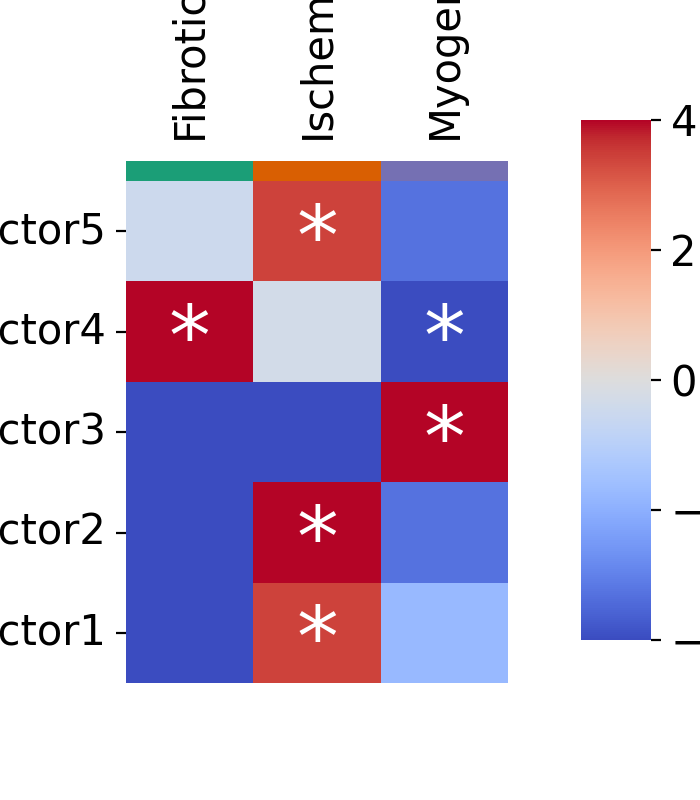

<Figure size 350x20 with 0 Axes>

In [ ]:
create_heatmap(odds, label='adj_pval', fill='log2_odds', index_key="factor", column_key='patient_group',
               cbar_label="log2 Odds Ratios", significance_level=0.05, 
               max_value=4, figsize=(3.5, 4), cmap='coolwarm',
               group_annotations={'Myogenic':'#7570b3', 'Fibrotic': '#1b9e77', 'Ischemic':'#d95f02'},
               move_labels=True
               )

In [ ]:
odds.to_csv(os.path.join("..", "..", "figures", "source", "Fig3C.csv"))

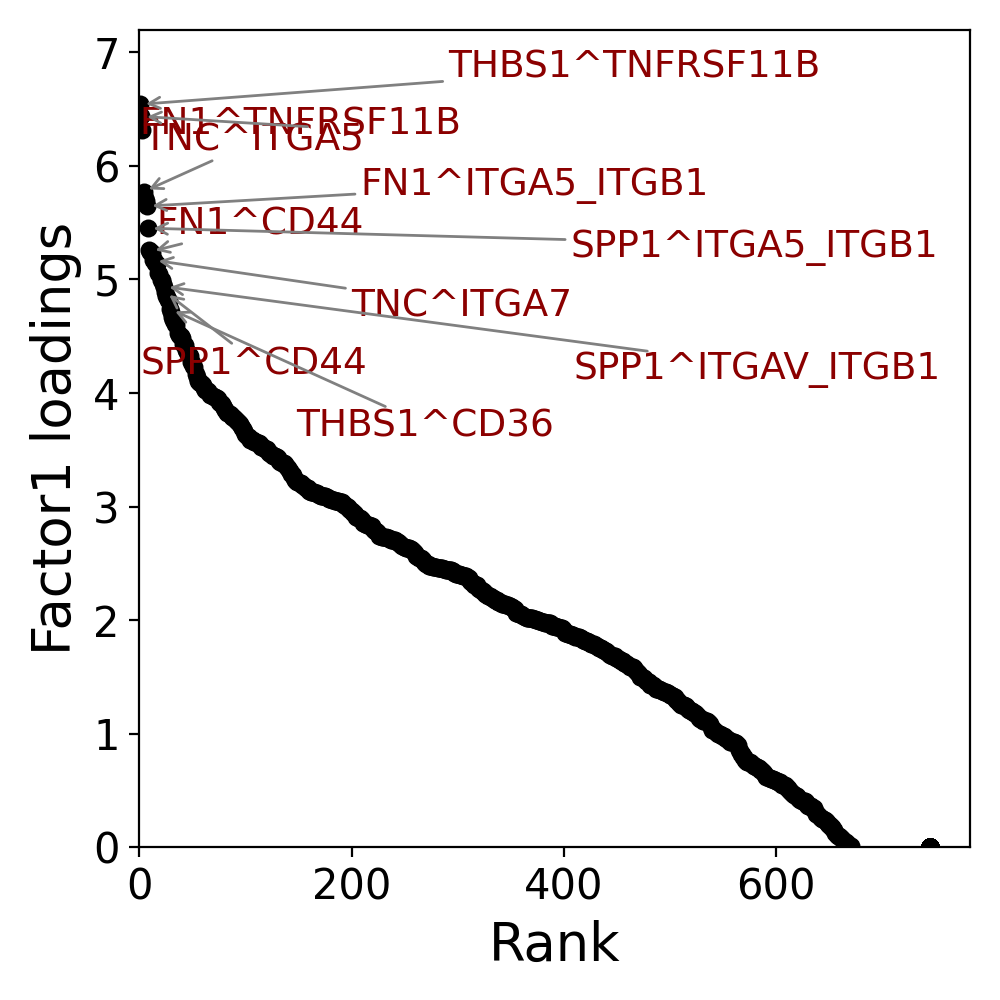

In [ ]:
plot_lr_pairs(lr_loadings, 
              fct='Factor1',
              # lambada to check if index contains any of the substrings ("FN1|NAMPT") else None
              label_fun=lambda x: x['index'] if (any([s in x['index'] for s in ["FN1", 'TNC', 'THBS1', 'SPP1']]) and (x['rank'] <= 30)) else None, # , 'NAMPT'
              figsize=(5, 5),
              adjust_text_kwargs={'arrowprops': dict(arrowstyle='->', color='grey', lw=1), 
                                  'expand_text':(1, 1.5),
                                  'expand_points':(1.1, 1.5),
                                  # 'force_explode':(0.4, 0.4),
                                  # 'force_text':(0.5, 0.5),
                                #   'expand': (2, 1),
                                  }
              )

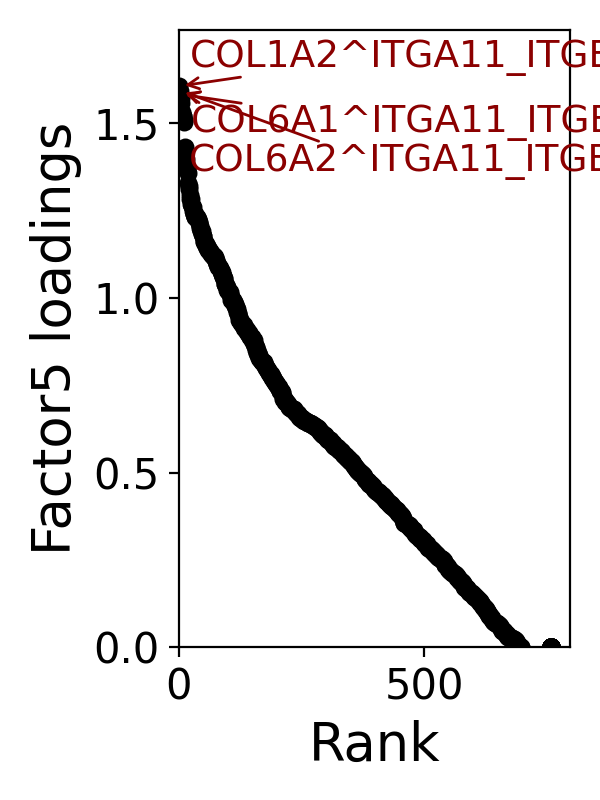

In [ ]:
plot_lr_pairs(lr_loadings, 
              fct='Factor5',
              label_fun=lambda x: x['index'] if x['rank'] <= 3 else None,
              figsize=(3, 4),
              adjust_text_kwargs={'arrowprops': dict(arrowstyle='->', color='darkred', lw=1), 
                                  'expand_text':(1, 1),
                                  'expand_points':(1.1, 1.5),
                                  # 'force_explode':(0.4, 0.4),
                                  # 'force_text':(0.5, 0.5),
                                #   'expand': (2, 1),
                                  }
              )

In [ ]:
from scipy.stats import spearmanr

In [ ]:
# pairwise correlations between factors
for i in range(0, nmfdata.shape[1]):
    for j in range(i+1, nmfdata.shape[1]):
        print(f"Factor{i+1} vs Factor{j+1}: {spearmanr(nmfdata.X[:, i], nmfdata.X[:,j])}")

Factor1 vs Factor2: SignificanceResult(statistic=0.35393756840294266, pvalue=0.0)
Factor1 vs Factor3: SignificanceResult(statistic=-0.16444320230604134, pvalue=0.0)
Factor1 vs Factor4: SignificanceResult(statistic=-0.29672254214988875, pvalue=0.0)
Factor1 vs Factor5: SignificanceResult(statistic=0.3776662585185418, pvalue=0.0)
Factor2 vs Factor3: SignificanceResult(statistic=-0.26406431752569365, pvalue=0.0)
Factor2 vs Factor4: SignificanceResult(statistic=-0.0021448349487603827, pvalue=0.5171559920825468)
Factor2 vs Factor5: SignificanceResult(statistic=0.4237340538642914, pvalue=0.0)
Factor3 vs Factor4: SignificanceResult(statistic=-0.6318104229514592, pvalue=0.0)
Factor3 vs Factor5: SignificanceResult(statistic=-0.1801717796570736, pvalue=0.0)
Factor4 vs Factor5: SignificanceResult(statistic=0.14302832607834418, pvalue=0.0)


Select Spatially-interesting LRs

In [ ]:
lr_nmf = pd.read_csv(os.path.join('results', 'lr_loadings.csv'), index_col=0)
# pivot longer
lr_nmf = lr_nmf.reset_index().melt(id_vars='index', var_name='factor', value_name='loading')

In [ ]:
lr_nmf['top5'] = lr_nmf.groupby('factor').apply(lambda x: x['loading'] >= x['loading'].quantile(0.95)).values
lr_nmf['top1std'] = lr_nmf.groupby('factor').apply(lambda x: x['loading'] >= x['loading'].quantile(0.68)).values

/tmp/ipykernel_4181319/2511497081.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
/tmp/ipykernel_4181319/2511497081.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


In [ ]:
lr_nmf.reset_index(drop=True, inplace=True)

# separete by ^ into ligand and receptor
lr_nmf['ligand'] = lr_nmf['index'].str.split('^').str[0]
lr_nmf['receptor'] = lr_nmf['index'].str.split('^').str[1]
resource = lr_nmf.drop_duplicates(['ligand', 'receptor'])

In [ ]:
resource.to_csv(os.path.join("results", 'lr_pairs.csv'), index=False)

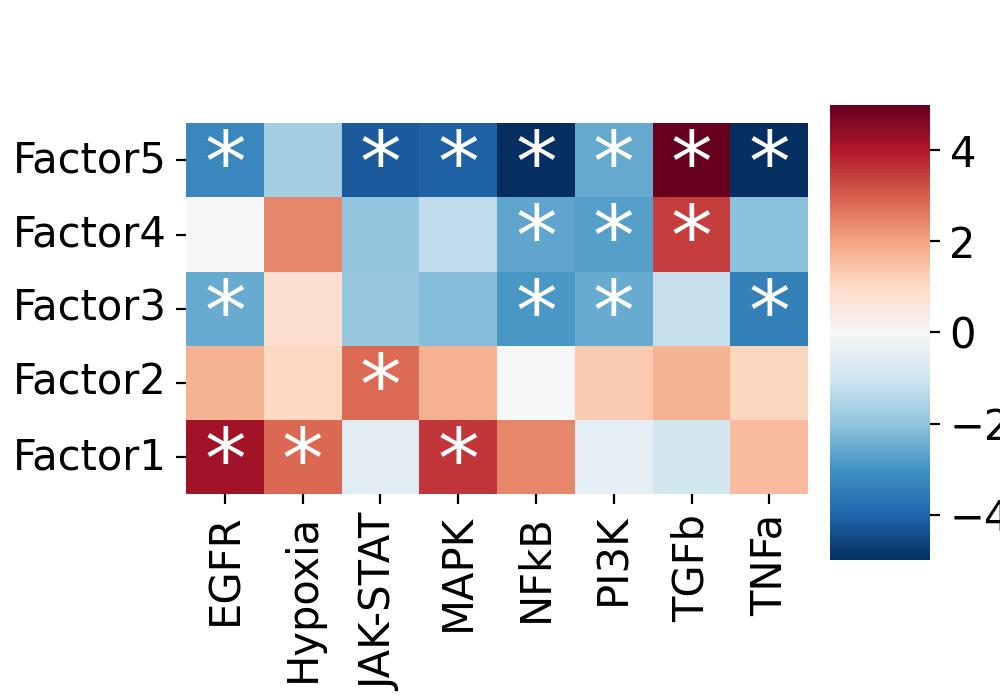

<Figure size 500x20 with 0 Axes>

In [ ]:
# Plot the first scatter plot in the first subplot; NOTE this plot does not work with squidpy..
create_heatmap(dc_res,
               index_key="factor",
               column_key='pathway',
               label='adj_pval', 
            #    xlabel="",
               figsize=(5, 3.5),
               cbar_label='Enrichment Score',
               significance_level=0.05,
               max_value=5)

In [ ]:
dc_res.to_csv(os.path.join("..", "..", "figures", "source", "Fig3D.csv"))

Visualise LRs

In [ ]:
sample_id = 'ACH0014'
interaction = 'FN1^ITGA5_ITGB1' # 'SPP1^ITGA5_ITGB1'
labels = {'Factor1':'NMF Loadings', 'FN1^ITGA5_ITGB1':'Cosine Similarity', 'SPP1^ITGA5_ITGB1':'Cosine Similarity'}
plot_kwargs = {'img':False, 'frameon':False,'size':1.55, 'figsize':(5, 5), 'return_ax':False}


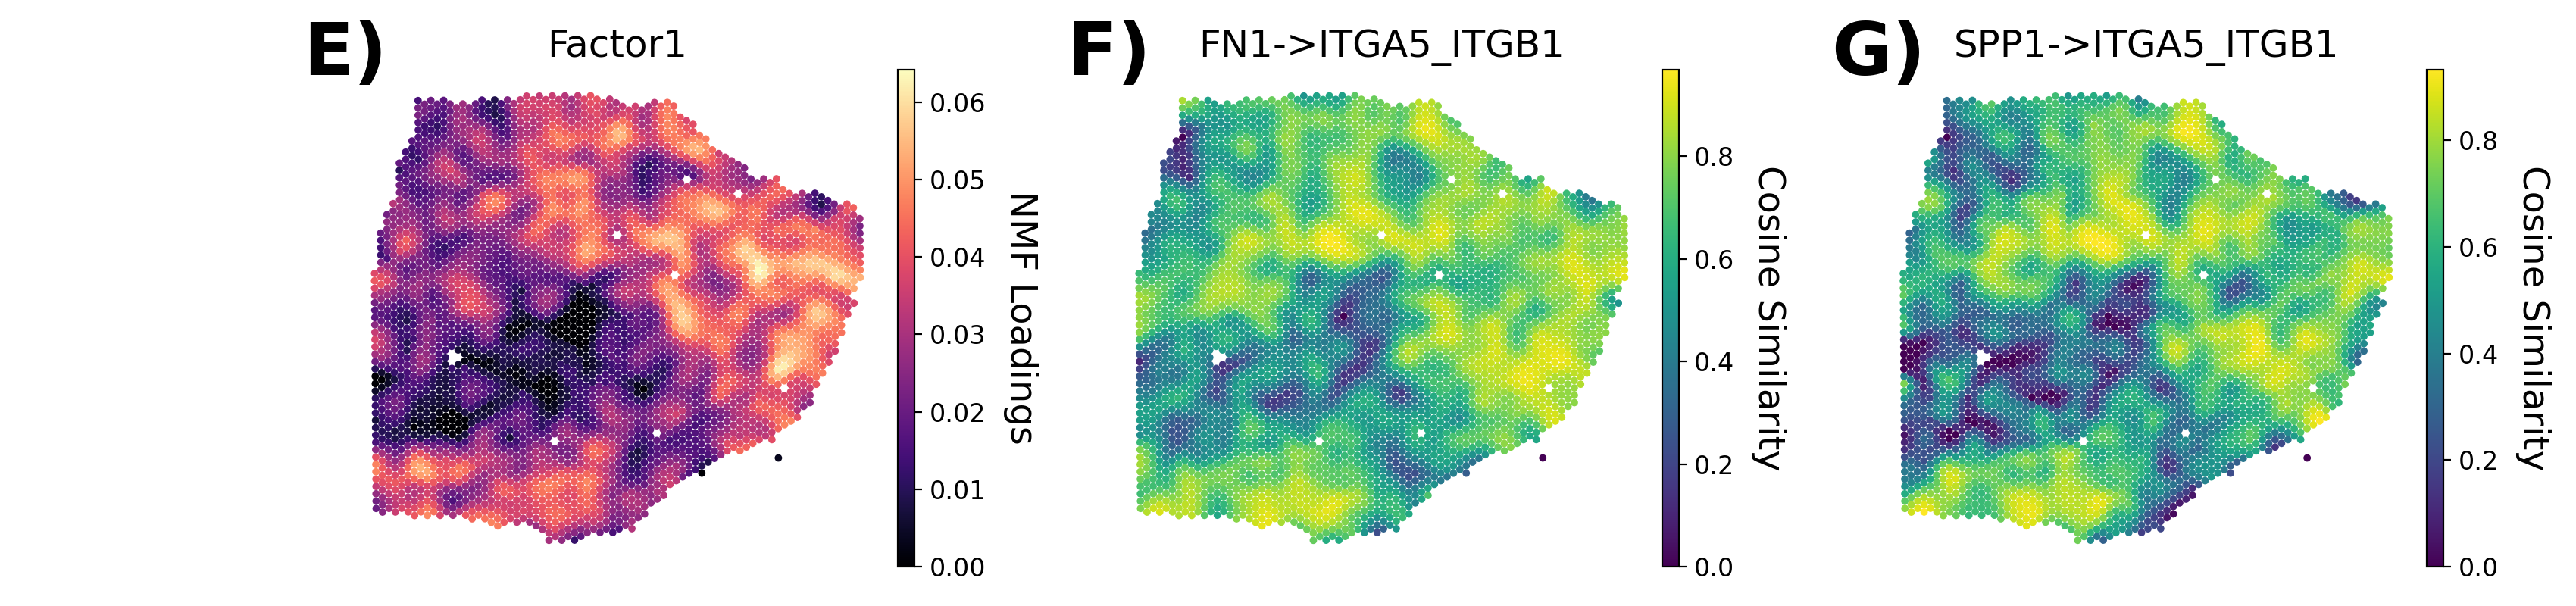

In [ ]:
# set background to black
# plt.style.use('dark_background')
# set background to white
plt.style.use('default')

fig, axs = plt.subplots(1, 3, figsize=(17, 4))

lrdata = sc.read_h5ad(os.path.join('results', 'lr', sample_id + '.h5ad'))
nmfdata = sc.read_h5ad(os.path.join('results', 'nmf', sample_id + '.h5ad'))

# Plot the second scatter plot in the second subplot

for i, (label, title) in enumerate(labels.items()):
    
    if label == 'Factor1':
        # Plot the first scatter plot in the first subplot
        sq.pl.spatial_scatter(nmfdata, color=[label], ax=axs[i], **plot_kwargs, title=label, cmap='magma')
    else:
        sq.pl.spatial_scatter(lrdata, color=[label], ax=axs[i], **plot_kwargs, title=label.replace('^', '->'))

    cbar = axs[i].collections[0].colorbar
    cbar.set_label(labels[label], rotation=270, labelpad=25, fontsize='xx-large')
    cbar.ax.tick_params(labelsize='large') # , colors='white'

# Add D), E), F), G)
sublabs = ['E)', 'F)', 'G)']
for i, ax in enumerate(axs):
    ax.text(-0.08, 1.1, sublabs[i], transform=ax.transAxes, fontsize=35, fontweight='bold', va='top')
    
    # make title of each lager
    ax.title.set_fontsize(18)



# force the subplot to be close
plt.subplots_adjust(wspace=-0.4)
plt.tight_layout()

# Show the plot
plt.savefig(os.path.join('..', '..', 'figures', 'Fig3E-F.pdf'), dpi=300, bbox_inches='tight')



In [ ]:
# adata = sc.read_h5ad(os.path.join('results', 'processed', sample_id + '.h5ad'))
# genes = ['CD36', 'CD44', 'FN1', 'ITGA5', 'ITGA7', 'ITGAV', 'ITGB1', 'NAMPT', 'SPP1', 'THBS1', 'TNC']
# sq.pl.spatial_scatter(adata, color=genes, **plot_kwargs, cmap='magma')

In [36]:
lr_nmf.to_csv(os.path.join('..', '..', 'figures', 'source', 'SuppDataFig3_NMFloadings.csv'))

In [46]:
df = pd.DataFrame(lrdata_all.obsm['NMF_W'], columns = [f'Factor{i+1}' for i in range(5)], index=lrdata_all.obs.index)
df.to_csv(os.path.join('..', '..', 'figures', 'source', 'SuppDataFig3_NMFscores.csv'))